# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 12.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 15.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 17.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 350 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [9]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp24 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [11]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [12]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [13]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1328103324105678848
1328103324365819906
1328103325439586305
1328103326131564548
1328103327666728964
1328103327746453504
1328103327008219136
1328103329059254272
1328103329646452736
1328103329705050113
1328103331433127936
1328103331470798848
1328103332066586624
1328103332066578432
1328103332234326019
1328103332339195906
1328103333056352256
1328103333853159424
1328103334071431168
1328103334125834240
1328103335040266242
1328103335237459968
1328103335703048193
1328103336827121664
1328103337267433472
1328103338399961088
1328103339402424320
1328103339595157504
1328103340048171010
1328103340488716289
1328103340497047552
1328103341138849799
1328103341658943489
1328103342762061825
1328103343961600001
1328103345123328001
1328103345861562375
1328103346276888577
1328103346725642246
1328103347769864192
1328103347967160320
1328103348722077697
1328103348797534208
1328103350420733952
1328103351532261382
1328103352773849095
1328103352924827650
1328103353067458560
1328103353696530433
1328103354442993665


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [16]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [17]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [18]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 15 22:34:58 +0000 2020'
'Sun Nov 15 22:34:58 +0000 2020'
'Sun Nov 15 22:34:57 +0000 2020'
'Sun Nov 15 22:34:57 +0000 2020'
'Sun Nov 15 22:34:57 +0000 2020'
'Sun Nov 15 22:34:57 +0000 2020'
'Sun Nov 15 22:34:57 +0000 2020'
'Sun Nov 15 22:34:56 +0000 2020'
'Sun Nov 15 22:34:56 +0000 2020'
'Sun Nov 15 22:34:56 +0000 2020'
'Sun Nov 15 22:34:56 +0000 2020'
'Sun Nov 15 22:34:56 +0000 2020'
'Sun Nov 15 22:34:55 +0000 2020'
'Sun Nov 15 22:34:55 +0000 2020'
'Sun Nov 15 22:34:55 +0000 2020'
'Sun Nov 15 22:34:55 +0000 2020'
'Sun Nov 15 22:34:55 +0000 2020'
'Sun Nov 15 22:34:54 +0000 2020'
'Sun Nov 15 22:34:53 +0000 2020'
'Sun Nov 15 22:34:53 +0000 2020'
'Sun Nov 15 22:34:53 +0000 2020'
'Sun Nov 15 22:34:52 +0000 2020'
'Sun Nov 15 22:34:52 +0000 2020'
'Sun Nov 15 22:34:52 +0000 2020'
'Sun Nov 15 22:34:52 +0000 2020'
'Sun Nov 15 22:34:52 +0000 2020'
'Sun Nov 15 22:34:52 +0000 2020'
'Sun Nov 15 22:34:51 +0000 2020'
'Sun Nov 15 22:34:51 +0000 2020'
'Sun Nov 15 22:34:51 +0000 2020'
'Sun Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [19]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 15 22:34:37 +0000 2020'
'Sun Nov 15 22:34:37 +0000 2020'
'Sun Nov 15 22:34:37 +0000 2020'
'Sun Nov 15 22:34:36 +0000 2020'
'Sun Nov 15 22:34:36 +0000 2020'
'Sun Nov 15 22:34:35 +0000 2020'
'Sun Nov 15 22:34:35 +0000 2020'
'Sun Nov 15 22:34:35 +0000 2020'
'Sun Nov 15 22:34:35 +0000 2020'
'Sun Nov 15 22:34:34 +0000 2020'
'Sun Nov 15 22:34:34 +0000 2020'
'Sun Nov 15 22:34:34 +0000 2020'
'Sun Nov 15 22:34:34 +0000 2020'
'Sun Nov 15 22:34:33 +0000 2020'
'Sun Nov 15 22:34:33 +0000 2020'
'Sun Nov 15 22:34:33 +0000 2020'
'Sun Nov 15 22:34:33 +0000 2020'
'Sun Nov 15 22:34:33 +0000 2020'
'Sun Nov 15 22:34:33 +0000 2020'
'Sun Nov 15 22:34:32 +0000 2020'
'Sun Nov 15 22:34:32 +0000 2020'
'Sun Nov 15 22:34:32 +0000 2020'
'Sun Nov 15 22:34:32 +0000 2020'
'Sun Nov 15 22:34:31 +0000 2020'
'Sun Nov 15 22:34:31 +0000 2020'
'Sun Nov 15 22:34:31 +0000 2020'
'Sun Nov 15 22:34:29 +0000 2020'
'Sun Nov 15 22:34:29 +0000 2020'
'Sun Nov 15 22:34:29 +0000 2020'
'Sun Nov 15 22:34:29 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:33:31 +0000 2020'
'Sun Nov 15 22:33:30 +0000 2020'
'Sun Nov 15 22:33:30 +0000 2020'
'Sun Nov 15 22:33:30 +0000 2020'
'Sun Nov 15 22:33:30 +0000 2020'
'Sun Nov 15 22:33:30 +0000 2020'
'Sun Nov 15 22:33:29 +0000 2020'
'Sun Nov 15 22:33:29 +0000 2020'
'Sun Nov 15 22:33:29 +0000 2020'
'Sun Nov 15 22:33:29 +0000 2020'
'Sun Nov 15 22:33:29 +0000 2020'
'Sun Nov 15 22:33:29 +0000 2020'
'Sun Nov 15 22:33:28 +0000 2020'
'Sun Nov 15 22:33:28 +0000 2020'
'Sun Nov 15 22:33:28 +0000 2020'
'Sun Nov 15 22:33:27 +0000 2020'
'Sun Nov 15 22:33:27 +0000 2020'
'Sun Nov 15 22:33:27 +0000 2020'
'Sun Nov 15 22:33:27 +0000 2020'
'Sun Nov 15 22:33:27 +0000 2020'
'Sun Nov 15 22:33:27 +0000 2020'
'Sun Nov 15 22:33:27 +0000 2020'
'Sun Nov 15 22:33:26 +0000 2020'
'Sun Nov 15 22:33:26 +0000 2020'
'Sun Nov 15 22:33:26 +0000 2020'
'Sun Nov 15 22:33:26 +0000 2020'
'Sun Nov 15 22:33:26 +0000 2020'
'Sun Nov 15 22:33:26 +0000 2020'
'Sun Nov 15 22:33:26 +0000 2020'
'Sun Nov 15 22:33:25 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:32:26 +0000 2020'
'Sun Nov 15 22:32:26 +0000 2020'
'Sun Nov 15 22:32:26 +0000 2020'
'Sun Nov 15 22:32:25 +0000 2020'
'Sun Nov 15 22:32:25 +0000 2020'
'Sun Nov 15 22:32:25 +0000 2020'
'Sun Nov 15 22:32:25 +0000 2020'
'Sun Nov 15 22:32:25 +0000 2020'
'Sun Nov 15 22:32:25 +0000 2020'
'Sun Nov 15 22:32:25 +0000 2020'
'Sun Nov 15 22:32:25 +0000 2020'
'Sun Nov 15 22:32:25 +0000 2020'
'Sun Nov 15 22:32:24 +0000 2020'
'Sun Nov 15 22:32:24 +0000 2020'
'Sun Nov 15 22:32:24 +0000 2020'
'Sun Nov 15 22:32:24 +0000 2020'
'Sun Nov 15 22:32:24 +0000 2020'
'Sun Nov 15 22:32:24 +0000 2020'
'Sun Nov 15 22:32:24 +0000 2020'
'Sun Nov 15 22:32:24 +0000 2020'
'Sun Nov 15 22:32:24 +0000 2020'
'Sun Nov 15 22:32:23 +0000 2020'
'Sun Nov 15 22:32:23 +0000 2020'
'Sun Nov 15 22:32:22 +0000 2020'
'Sun Nov 15 22:32:22 +0000 2020'
'Sun Nov 15 22:32:22 +0000 2020'
'Sun Nov 15 22:32:21 +0000 2020'
'Sun Nov 15 22:32:21 +0000 2020'
'Sun Nov 15 22:32:20 +0000 2020'
'Sun Nov 15 22:32:20 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:30:54 +0000 2020'
'Sun Nov 15 22:30:53 +0000 2020'
'Sun Nov 15 22:30:53 +0000 2020'
'Sun Nov 15 22:30:53 +0000 2020'
'Sun Nov 15 22:30:53 +0000 2020'
'Sun Nov 15 22:30:53 +0000 2020'
'Sun Nov 15 22:30:53 +0000 2020'
'Sun Nov 15 22:30:52 +0000 2020'
'Sun Nov 15 22:30:52 +0000 2020'
'Sun Nov 15 22:30:52 +0000 2020'
'Sun Nov 15 22:30:52 +0000 2020'
'Sun Nov 15 22:30:52 +0000 2020'
'Sun Nov 15 22:30:52 +0000 2020'
'Sun Nov 15 22:30:51 +0000 2020'
'Sun Nov 15 22:30:51 +0000 2020'
'Sun Nov 15 22:30:51 +0000 2020'
'Sun Nov 15 22:30:50 +0000 2020'
'Sun Nov 15 22:30:50 +0000 2020'
'Sun Nov 15 22:30:50 +0000 2020'
'Sun Nov 15 22:30:50 +0000 2020'
'Sun Nov 15 22:30:50 +0000 2020'
'Sun Nov 15 22:30:50 +0000 2020'
'Sun Nov 15 22:30:49 +0000 2020'
'Sun Nov 15 22:30:49 +0000 2020'
'Sun Nov 15 22:30:49 +0000 2020'
'Sun Nov 15 22:30:49 +0000 2020'
'Sun Nov 15 22:30:48 +0000 2020'
'Sun Nov 15 22:30:48 +0000 2020'
'Sun Nov 15 22:30:48 +0000 2020'
'Sun Nov 15 22:30:48 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:29:54 +0000 2020'
'Sun Nov 15 22:29:54 +0000 2020'
'Sun Nov 15 22:29:54 +0000 2020'
'Sun Nov 15 22:29:54 +0000 2020'
'Sun Nov 15 22:29:53 +0000 2020'
'Sun Nov 15 22:29:53 +0000 2020'
'Sun Nov 15 22:29:53 +0000 2020'
'Sun Nov 15 22:29:53 +0000 2020'
'Sun Nov 15 22:29:53 +0000 2020'
'Sun Nov 15 22:29:52 +0000 2020'
'Sun Nov 15 22:29:52 +0000 2020'
'Sun Nov 15 22:29:52 +0000 2020'
'Sun Nov 15 22:29:51 +0000 2020'
'Sun Nov 15 22:29:51 +0000 2020'
'Sun Nov 15 22:29:51 +0000 2020'
'Sun Nov 15 22:29:51 +0000 2020'
'Sun Nov 15 22:29:51 +0000 2020'
'Sun Nov 15 22:29:49 +0000 2020'
'Sun Nov 15 22:29:49 +0000 2020'
'Sun Nov 15 22:29:48 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 15 22:29:47 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:28:54 +0000 2020'
'Sun Nov 15 22:28:54 +0000 2020'
'Sun Nov 15 22:28:53 +0000 2020'
'Sun Nov 15 22:28:53 +0000 2020'
'Sun Nov 15 22:28:53 +0000 2020'
'Sun Nov 15 22:28:53 +0000 2020'
'Sun Nov 15 22:28:52 +0000 2020'
'Sun Nov 15 22:28:52 +0000 2020'
'Sun Nov 15 22:28:52 +0000 2020'
'Sun Nov 15 22:28:52 +0000 2020'
'Sun Nov 15 22:28:52 +0000 2020'
'Sun Nov 15 22:28:51 +0000 2020'
'Sun Nov 15 22:28:51 +0000 2020'
'Sun Nov 15 22:28:51 +0000 2020'
'Sun Nov 15 22:28:51 +0000 2020'
'Sun Nov 15 22:28:50 +0000 2020'
'Sun Nov 15 22:28:50 +0000 2020'
'Sun Nov 15 22:28:49 +0000 2020'
'Sun Nov 15 22:28:49 +0000 2020'
'Sun Nov 15 22:28:49 +0000 2020'
'Sun Nov 15 22:28:48 +0000 2020'
'Sun Nov 15 22:28:48 +0000 2020'
'Sun Nov 15 22:28:48 +0000 2020'
'Sun Nov 15 22:28:47 +0000 2020'
'Sun Nov 15 22:28:47 +0000 2020'
'Sun Nov 15 22:28:47 +0000 2020'
'Sun Nov 15 22:28:46 +0000 2020'
'Sun Nov 15 22:28:46 +0000 2020'
'Sun Nov 15 22:28:46 +0000 2020'
'Sun Nov 15 22:28:46 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:27:53 +0000 2020'
'Sun Nov 15 22:27:53 +0000 2020'
'Sun Nov 15 22:27:53 +0000 2020'
'Sun Nov 15 22:27:52 +0000 2020'
'Sun Nov 15 22:27:52 +0000 2020'
'Sun Nov 15 22:27:52 +0000 2020'
'Sun Nov 15 22:27:52 +0000 2020'
'Sun Nov 15 22:27:51 +0000 2020'
'Sun Nov 15 22:27:51 +0000 2020'
'Sun Nov 15 22:27:51 +0000 2020'
'Sun Nov 15 22:27:51 +0000 2020'
'Sun Nov 15 22:27:51 +0000 2020'
'Sun Nov 15 22:27:50 +0000 2020'
'Sun Nov 15 22:27:50 +0000 2020'
'Sun Nov 15 22:27:50 +0000 2020'
'Sun Nov 15 22:27:50 +0000 2020'
'Sun Nov 15 22:27:50 +0000 2020'
'Sun Nov 15 22:27:49 +0000 2020'
'Sun Nov 15 22:27:49 +0000 2020'
'Sun Nov 15 22:27:49 +0000 2020'
'Sun Nov 15 22:27:49 +0000 2020'
'Sun Nov 15 22:27:48 +0000 2020'
'Sun Nov 15 22:27:48 +0000 2020'
'Sun Nov 15 22:27:48 +0000 2020'
'Sun Nov 15 22:27:47 +0000 2020'
'Sun Nov 15 22:27:46 +0000 2020'
'Sun Nov 15 22:27:45 +0000 2020'
'Sun Nov 15 22:27:45 +0000 2020'
'Sun Nov 15 22:27:45 +0000 2020'
'Sun Nov 15 22:27:45 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:26:51 +0000 2020'
'Sun Nov 15 22:26:51 +0000 2020'
'Sun Nov 15 22:26:51 +0000 2020'
'Sun Nov 15 22:26:51 +0000 2020'
'Sun Nov 15 22:26:50 +0000 2020'
'Sun Nov 15 22:26:50 +0000 2020'
'Sun Nov 15 22:26:50 +0000 2020'
'Sun Nov 15 22:26:50 +0000 2020'
'Sun Nov 15 22:26:50 +0000 2020'
'Sun Nov 15 22:26:50 +0000 2020'
'Sun Nov 15 22:26:50 +0000 2020'
'Sun Nov 15 22:26:49 +0000 2020'
'Sun Nov 15 22:26:49 +0000 2020'
'Sun Nov 15 22:26:49 +0000 2020'
'Sun Nov 15 22:26:48 +0000 2020'
'Sun Nov 15 22:26:48 +0000 2020'
'Sun Nov 15 22:26:48 +0000 2020'
'Sun Nov 15 22:26:48 +0000 2020'
'Sun Nov 15 22:26:47 +0000 2020'
'Sun Nov 15 22:26:47 +0000 2020'
'Sun Nov 15 22:26:47 +0000 2020'
'Sun Nov 15 22:26:47 +0000 2020'
'Sun Nov 15 22:26:47 +0000 2020'
'Sun Nov 15 22:26:46 +0000 2020'
'Sun Nov 15 22:26:46 +0000 2020'
'Sun Nov 15 22:26:46 +0000 2020'
'Sun Nov 15 22:26:46 +0000 2020'
'Sun Nov 15 22:26:45 +0000 2020'
'Sun Nov 15 22:26:45 +0000 2020'
'Sun Nov 15 22:26:45 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:25:47 +0000 2020'
'Sun Nov 15 22:25:47 +0000 2020'
'Sun Nov 15 22:25:47 +0000 2020'
'Sun Nov 15 22:25:47 +0000 2020'
'Sun Nov 15 22:25:47 +0000 2020'
'Sun Nov 15 22:25:47 +0000 2020'
'Sun Nov 15 22:25:46 +0000 2020'
'Sun Nov 15 22:25:46 +0000 2020'
'Sun Nov 15 22:25:46 +0000 2020'
'Sun Nov 15 22:25:45 +0000 2020'
'Sun Nov 15 22:25:45 +0000 2020'
'Sun Nov 15 22:25:45 +0000 2020'
'Sun Nov 15 22:25:45 +0000 2020'
'Sun Nov 15 22:25:45 +0000 2020'
'Sun Nov 15 22:25:45 +0000 2020'
'Sun Nov 15 22:25:44 +0000 2020'
'Sun Nov 15 22:25:44 +0000 2020'
'Sun Nov 15 22:25:44 +0000 2020'
'Sun Nov 15 22:25:44 +0000 2020'
'Sun Nov 15 22:25:44 +0000 2020'
'Sun Nov 15 22:25:44 +0000 2020'
'Sun Nov 15 22:25:44 +0000 2020'
'Sun Nov 15 22:25:43 +0000 2020'
'Sun Nov 15 22:25:43 +0000 2020'
'Sun Nov 15 22:25:43 +0000 2020'
'Sun Nov 15 22:25:43 +0000 2020'
'Sun Nov 15 22:25:43 +0000 2020'
'Sun Nov 15 22:25:42 +0000 2020'
'Sun Nov 15 22:25:42 +0000 2020'
'Sun Nov 15 22:25:42 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:24:48 +0000 2020'
'Sun Nov 15 22:24:48 +0000 2020'
'Sun Nov 15 22:24:48 +0000 2020'
'Sun Nov 15 22:24:47 +0000 2020'
'Sun Nov 15 22:24:47 +0000 2020'
'Sun Nov 15 22:24:47 +0000 2020'
'Sun Nov 15 22:24:47 +0000 2020'
'Sun Nov 15 22:24:46 +0000 2020'
'Sun Nov 15 22:24:46 +0000 2020'
'Sun Nov 15 22:24:46 +0000 2020'
'Sun Nov 15 22:24:46 +0000 2020'
'Sun Nov 15 22:24:46 +0000 2020'
'Sun Nov 15 22:24:46 +0000 2020'
'Sun Nov 15 22:24:46 +0000 2020'
'Sun Nov 15 22:24:45 +0000 2020'
'Sun Nov 15 22:24:45 +0000 2020'
'Sun Nov 15 22:24:45 +0000 2020'
'Sun Nov 15 22:24:45 +0000 2020'
'Sun Nov 15 22:24:44 +0000 2020'
'Sun Nov 15 22:24:44 +0000 2020'
'Sun Nov 15 22:24:44 +0000 2020'
'Sun Nov 15 22:24:44 +0000 2020'
'Sun Nov 15 22:24:44 +0000 2020'
'Sun Nov 15 22:24:44 +0000 2020'
'Sun Nov 15 22:24:44 +0000 2020'
'Sun Nov 15 22:24:44 +0000 2020'
'Sun Nov 15 22:24:43 +0000 2020'
'Sun Nov 15 22:24:43 +0000 2020'
'Sun Nov 15 22:24:43 +0000 2020'
'Sun Nov 15 22:24:43 +0000 2020'
'Sun Nov 1

'Sun Nov 15 22:23:50 +0000 2020'
'Sun Nov 15 22:23:49 +0000 2020'
'Sun Nov 15 22:23:49 +0000 2020'
'Sun Nov 15 22:23:49 +0000 2020'
'Sun Nov 15 22:23:49 +0000 2020'
'Sun Nov 15 22:23:49 +0000 2020'
'Sun Nov 15 22:23:48 +0000 2020'
'Sun Nov 15 22:23:48 +0000 2020'
'Sun Nov 15 22:23:48 +0000 2020'
'Sun Nov 15 22:23:48 +0000 2020'
'Sun Nov 15 22:23:48 +0000 2020'
'Sun Nov 15 22:23:48 +0000 2020'
'Sun Nov 15 22:23:47 +0000 2020'
'Sun Nov 15 22:23:47 +0000 2020'
'Sun Nov 15 22:23:47 +0000 2020'
'Sun Nov 15 22:23:46 +0000 2020'
'Sun Nov 15 22:23:46 +0000 2020'
'Sun Nov 15 22:23:46 +0000 2020'
'Sun Nov 15 22:23:46 +0000 2020'
'Sun Nov 15 22:23:45 +0000 2020'
'Sun Nov 15 22:23:45 +0000 2020'
'Sun Nov 15 22:23:45 +0000 2020'
'Sun Nov 15 22:23:45 +0000 2020'
'Sun Nov 15 22:23:44 +0000 2020'
'Sun Nov 15 22:23:44 +0000 2020'
'Sun Nov 15 22:23:44 +0000 2020'
'Sun Nov 15 22:23:44 +0000 2020'
'Sun Nov 15 22:23:44 +0000 2020'
'Sun Nov 15 22:23:44 +0000 2020'
'Sun Nov 15 22:23:44 +0000 2020'
'Sun Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [20]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3159
2762


Create a text index and print the Tweets containing specific keywords. 

In [21]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [23]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: TodosUnidos2017
text: RT @DickMorrisTweet: Did Former Biden Staffer Delay Pfizer Vaccine Announcement Until AFTER The Election - Special Election Alert! https://…
----
name: Tati 🇺🇸
text: RT @BlueRedBlood: Wouldn't it be crazy to find out that the election software and the Covid19 stat software were written by the same compan…
----
name: Ramona Eid
text: RT @BlueRedBlood: Wouldn't it be crazy to find out that the election software and the Covid19 stat software were written by the same compan…
----
name: President- Elect Porthkerry
text: RT @BlueRedBlood: Wouldn't it be crazy to find out that the election software and the Covid19 stat software were written by the same compan…
----
name: Cris Thomas
text: RT @BlueRedBlood: Wouldn't it be crazy to find out that the election software and the Covid19 stat software were written by the same compan…
----
name: Janette Marie@aboutright
text: RT @BlueRedBlood: Wouldn't it be crazy to find out that the election software and the Covid19

In [24]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [25]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,quote_count,reply_count,filter_level,timestamp_ms
0,5fb1ad78a04542dbafdf3dbb,Sun Nov 15 22:26:57 +0000 2020,1328102213047169024,1328102213047169024,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,False,81,0,False,False,en,NaN,NaN,NaN,NaN
1,5fb1ad7ca04542dbafdf3f14,Sun Nov 15 22:25:40 +0000 2020,1328101890111008770,1328101890111008770,RT @BlueRedBlood: Wouldn't it be crazy to find...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,False,27,0,False,False,en,NaN,NaN,NaN,NaN
2,5fb1ad78a04542dbafdf3db7,Sun Nov 15 22:26:57 +0000 2020,1328102215559462912,1328102215559462912,RT @BlueRedBlood: Wouldn't it be crazy to find...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,False,26,0,False,False,en,NaN,NaN,NaN,NaN
3,5fb1ad76a04542dbafdf3d56,Sun Nov 15 22:27:21 +0000 2020,1328102313853116417,1328102313853116417,RT @BlueRedBlood: Wouldn't it be crazy to find...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,False,26,0,False,False,en,NaN,NaN,NaN,NaN
4,5fb1ad71a04542dbafdf3b60,Sun Nov 15 22:29:14 +0000 2020,1328102789743075328,1328102789743075328,RT @BlueRedBlood: Wouldn't it be crazy to find...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,False,25,0,False,False,en,NaN,NaN,NaN,NaN
5,5fb1ad6ea04542dbafdf3a4c,Sun Nov 15 22:30:12 +0000 2020,1328103030240272384,1328103030240272384,RT @BlueRedBlood: Wouldn't it be crazy to find...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",None,...,False,25,0,False,False,en,NaN,NaN,NaN,NaN
6,5fb1ac5fa04542dbafdf359a,Sun Nov 15 22:31:54 +0000 2020,1328103460508667906,1328103460508667906,RT @BlueRedBlood: Wouldn't it be crazy to find...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",None,...,False,0,0,False,False,en,0.0,0.0,low,1605479514611
7,5fb1ac42a04542dbafdf34d6,Sun Nov 15 22:31:25 +0000 2020,1328103340048171010,1328103340048171010,"In the last half hour, 1287 people tweeted abo...",False,"{'hashtags': [{'text': 'Civilwar', 'indices': ...",NaN,"<a href=""https://laramiewatherbot.co"" rel=""nof...",None,...,False,0,0,False,False,en,0.0,0.0,low,1605479485891
8,5fb1ac3fa04542dbafdf34ba,Sun Nov 15 22:31:22 +0000 2020,1328103324105678848,1328103324105678848,RT @BlueRedBlood: Wouldn't it be crazy to find...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",None,...,False,0,0,False,False,en,0.0,0.0,low,1605479482090
9,5fb1ad7ca04542dbafdf3f4b,Sun Nov 15 22:25:25 +0000 2020,1328101830073708544,1328101830073708544,Wouldn't it be crazy to find out that the elec...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,False,27,49,False,False,en,NaN,NaN,NaN,NaN


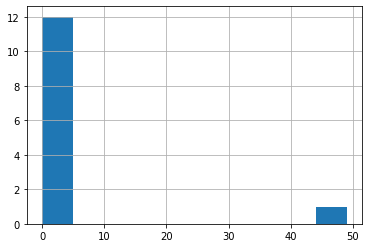

In [26]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count